# **Import Libraries**


In [1]:
import pandas as pd
import numpy 
numpy.random.BitGenerator = numpy.random.bit_generator.BitGenerator
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import os
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# **Define Data Path**

In [2]:
dir = 'data'   # rename the dir name with your directory dataset location

In [3]:
def get_class_name():
    """
    Args:
        nothing
    Returns:
      classes : list of folders name in the data set

    """  
    classes = os.listdir(dir)
    return classes

In [4]:
def define_paths(class_name):
    """
    Args:
        class_name: folder name of the data
    Returns:
        filepaths : list of files in this folder

    """  
    filepaths = []
    folder_path = os.path.join(dir,class_name)
    for file in os.listdir(folder_path):
        fpath = os.path.join(folder_path,file)
        filepaths.append(fpath)
    return filepaths

# **Visualize the classes**

### plot the first four images in the folder

In [5]:
def plot_class(class_name):
    
    plt.figure(figsize=(12,12))
    filep = define_paths(class_name)
    for i in range(1,5):
        plt.subplot(1,4,i)
        plt.tight_layout()
        rand_img = plt.imread(filep[i])
        plt.imshow(rand_img)
        plt.title(class_name, fontsize=20, color='blue')
        plt.xticks([])
        plt.yticks([])    

['Astrocitoma T1', 'Astrocitoma T1C+', 'Astrocitoma T2', 'Carcinoma T1', 'Carcinoma T1C+', 'Carcinoma T2', 'Ependimoma T1', 'Ependimoma T1C+', 'Ependimoma T2', 'Ganglioglioma T1', 'Ganglioglioma T1C+', 'Ganglioglioma T2', 'Germinoma T1', 'Germinoma T1C+', 'Germinoma T2', 'Glioblastoma T1', 'Glioblastoma T1C+', 'Glioblastoma T2', 'Granuloma T1', 'Granuloma T1C+', 'Granuloma T2', 'Meduloblastoma T1', 'Meduloblastoma T1C+', 'Meduloblastoma T2', 'Meningioma T1', 'Meningioma T1C+', 'Meningioma T2', 'Neurocitoma T1', 'Neurocitoma T1C+', 'Neurocitoma T2', 'NORMAL T1', 'NORMAL T2', 'Oligodendroglioma T1', 'Oligodendroglioma T1C+', 'Oligodendroglioma T2', 'Papiloma T1', 'Papiloma T1C+', 'Papiloma T2', 'Schwannoma T1', 'Schwannoma T1C+', 'Schwannoma T2', 'Tuberculoma T1', 'Tuberculoma T1C+', 'Tuberculoma T2']


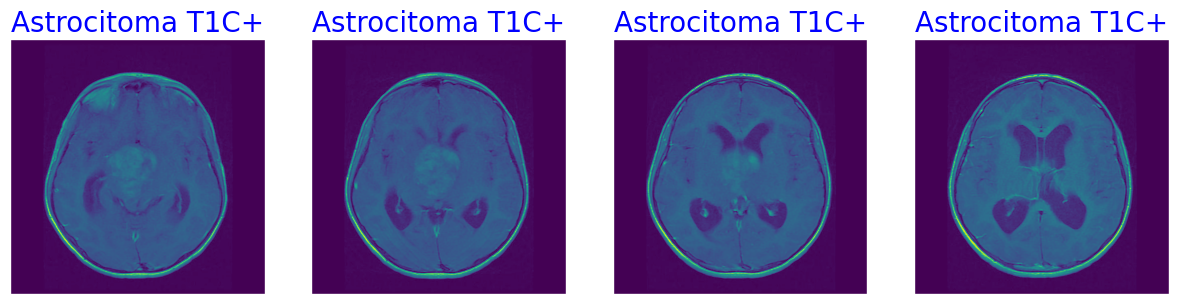

In [6]:
classes = get_class_name()
print(classes)
plot_class(classes[1])

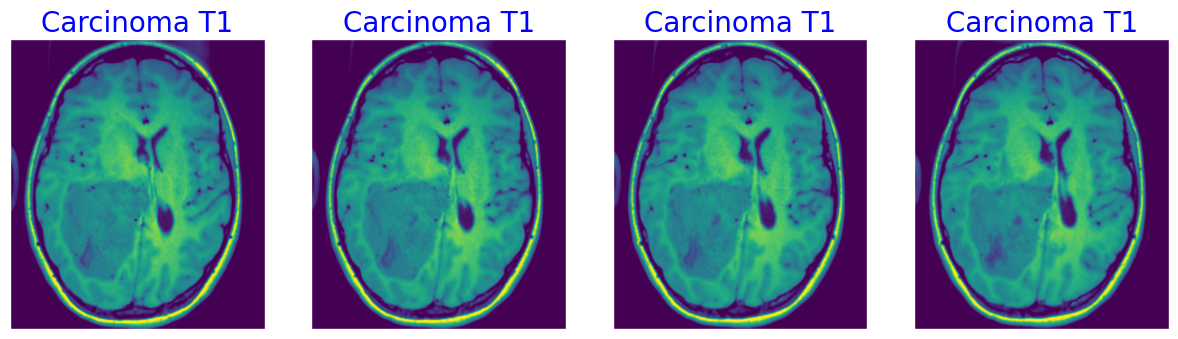

In [7]:
plot_class(classes[3])

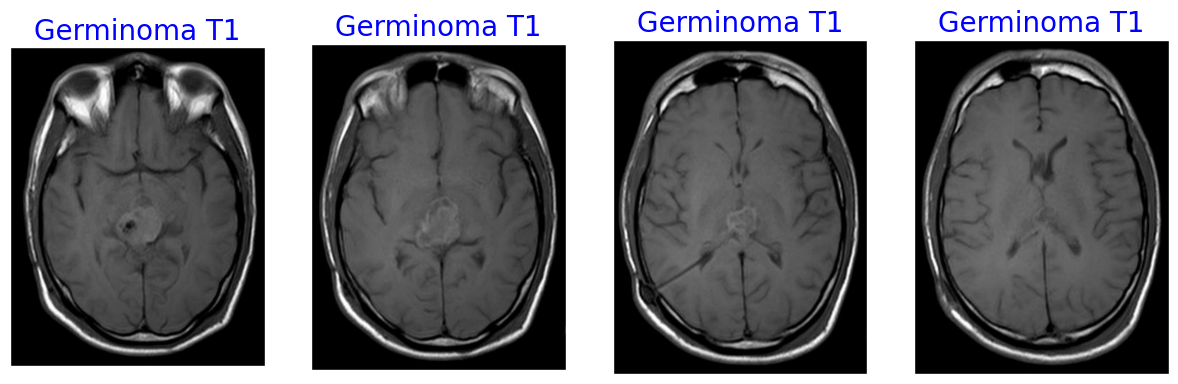

In [8]:
plot_class(classes[12])

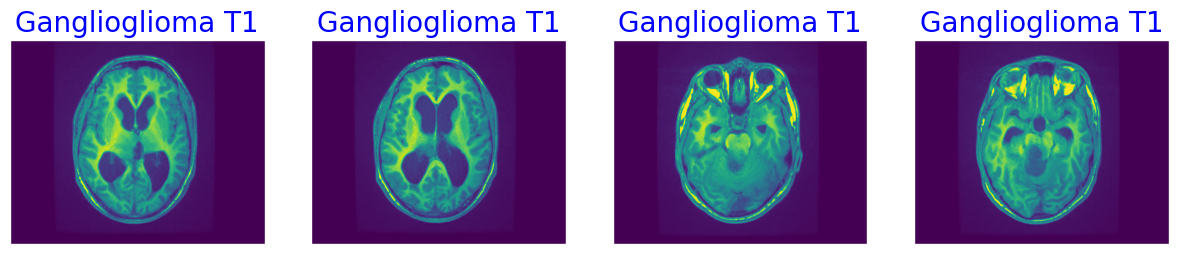

In [9]:
plot_class(classes[9])

# **EDA**

In [10]:
def main(train_data_path): 
    """
    Args:
      train_data_path (string): string includes your train data path
      test_data_path (string): string includes your test data path
      note: data_path argument must contains your classes dirs
      
    Returns:
      train_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the training images and the label of each image
      test_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the testing images and the label of each image

    """  
    filepaths = []
    labels = []
    classes_list = sorted(os.listdir(train_data_path))
    filepaths,labels = get_fileList(classes_list, train_data_path, filepaths, labels)
    
    train_df = obtain_train_df(filepaths, labels)
    
        
    return train_df



def get_fileList(classes_list, dirs, filepaths, labels):
    
    """
    Args:
      classes_list (list): list includes name of classes dirs
      dirs (string): the data path
      filepaths (list): empty list to fill with images paths later
      labels (list): empty list to fill with each image label later
      
    Returns:
      count (scalar):  number of images in your dataset
    """
    for s_class in classes_list:
        
        label = s_class
        classpath = os.path.join(dirs, s_class)
        flist = sorted(os.listdir(classpath))
        store_image_names_and_its_labels(flist, classpath, filepaths, labels, label)
        
    return filepaths, labels


def store_image_names_and_its_labels(flist, classpath, filepaths, labels, label):
    
    """
    Args:
      flist (list) : contains all the image names in certain class
      classes_list (list): list includes name of classes dirs
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      label (string): label for a specific image
      
    Returns:
      nothing
    """ 
    for file in flist:
        file_path = os.path.join(classpath, file)
        filepaths.append(file_path)
        labels.append(label[:-3])


def obtain_train_df(filepaths, labels):
    
    """
    Args:
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      
    Returns:
      train_df (DataFrame):  Dataframe with 2 columns contains each image path with its label
    """
    
    train_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return train_df


In [11]:
data_df = main(dir)


In [12]:
data_df.head()

,image_path,label
0,data\Astrocitoma T1\005_big_gallery.jpeg,Astrocitoma
1,data\Astrocitoma T1\006_big_gallery.jpeg,Astrocitoma
2,data\Astrocitoma T1\01809e58d2c1e7fff56cc5d852...,Astrocitoma
3,data\Astrocitoma T1\02df132a56dfb89ece42ee8d19...,Astrocitoma
4,data\Astrocitoma T1\044d8d9984902ca03e652a6f04...,Astrocitoma


In [13]:
num_classes = len(data_df['label'].unique())
print(f"We have {num_classes} classes")
print(f"We have {data_df.shape[0]} images")

We have 29 classes
We have 4479 images


In [14]:
data_df['label'].value_counts()

label
NORMAL                 522
Meningioma             505
Meningioma T           369
Astrocitoma            347
Schwannoma             271
Neurocitoma            234
Astrocitoma T          233
Neurocitoma T          223
Schwannoma T           194
Oligodendroglioma      152
Carcinoma              139
Papiloma               129
Carcinoma T            112
Glioblastoma           110
Papiloma T             108
Ependimoma             102
Glioblastoma T          94
Tuberculoma T           84
Oligodendroglioma T     72
Meduloblastoma T        67
Meduloblastoma          64
Tuberculoma             61
Germinoma               60
Ependimoma T            48
Granuloma               47
Ganglioglioma           43
Germinoma T             40
Granuloma T             31
Ganglioglioma T         18
Name: count, dtype: int64

In [15]:
def count_plot(x, title, xlabel, ylabel, width, length, order = None, rotation=False, palette='winter'):
    plt.figure(figsize=(width,length))
    sns.countplot(x = x, palette=palette, order = order)
    plt.title(title, fontsize=25)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

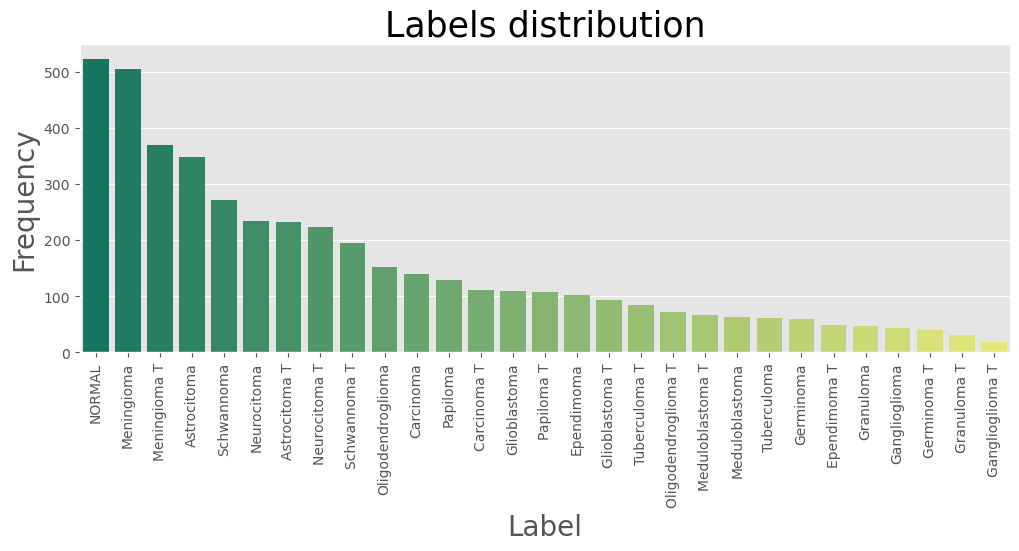

In [16]:
x = data_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution", "Label", 'Frequency', 12,4, rotation = True, order=order, palette='summer')

# **Split the data into train, test and val dataframes**

In [17]:
def define_paths(dir):
    filepaths = []
    labels = []
    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            # Select just tumor name
            fold = str(fold).replace('C+', '')
            labels.append(fold[:-3])

    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)

In [18]:
# data_df = main(dir)
files, classes = define_paths(dir)
df = define_df(files, classes)
print(data_df)
print(df)

                                             image_path        label
0              data\Astrocitoma T1\005_big_gallery.jpeg  Astrocitoma
1              data\Astrocitoma T1\006_big_gallery.jpeg  Astrocitoma
2     data\Astrocitoma T1\01809e58d2c1e7fff56cc5d852...  Astrocitoma
3     data\Astrocitoma T1\02df132a56dfb89ece42ee8d19...  Astrocitoma
4     data\Astrocitoma T1\044d8d9984902ca03e652a6f04...  Astrocitoma
...                                                 ...          ...
4474  data\Tuberculoma T2\dbd712fe3dbc4fb3536eb6197a...  Tuberculoma
4475  data\Tuberculoma T2\dde61fef7b3a7d2da301bae6ca...  Tuberculoma
4476  data\Tuberculoma T2\e1a2596e48ba5090a88403a1cc...  Tuberculoma
4477  data\Tuberculoma T2\f19e3f394493bf91cf319d4d18...  Tuberculoma
4478  data\Tuberculoma T2\fd57affc10044d67310769b90e...  Tuberculoma

[4479 rows x 2 columns]
                                              filepaths       labels
0              data\Astrocitoma T1\005_big_gallery.jpeg  Astrocitoma
1        

In [19]:
# Function that contain only a directory of data and it is not splitted
def tr_ts_data(tr_dir, ts_dir):
    # train and valid dataframe
    files, classes = define_paths(tr_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, valid_df = train_test_split(df, train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

    # test dataframe
    files, classes = define_paths(tr_dir)
    test_df = define_df(files, classes)
    return train_df, valid_df, test_df

# Function that contain train and test directory of data.
def full_data(data_dir):
    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

    # valid and test dataframe
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

    return train_df, valid_df, test_df


# function that contain the three directory of data train, valid, and test
def tr_val_ts_data(tr_dir, val_dir, ts_dir):

    # train dataframe
    files, classes = define_paths(tr_dir)
    train_df = define_df(files, classes)

    # validation dataframe
    files, classes = define_paths(val_dir)
    valid_df = define_df(files, classes)

    # test dataframe
    files, classes = define_paths(ts_dir)
    test_df = define_df(files, classes)

    return train_df, valid_df, test_df

In [20]:
def split_data(tr_dir, val_dir=None, ts_dir=None):
    '''
        This function split data into train, valid, and test after convert it to a dataframe.
        Dataset can be in several formats, it can contain train, valid, and test data, or it can contain only train and test data, etc.
        It depends on other needed function:
        - full_data function that contain only a directory of data and it is not splitted.
        - tr_ts_data function that contain train and test directory of data.
        - tr_val_ts_data function that contain the three directory of data train, valid, and test.
    '''

    # No Validation or Test data
    if val_dir == '' and ts_dir == '':
        train_df, valid_df, test_df = full_data(tr_dir)
        return train_df, valid_df, test_df

    # No Validation data
    elif val_dir == '' and ts_dir != '':
        train_df, valid_df, test_df = tr_ts_data(tr_dir, ts_dir)
        return train_df, valid_df, test_df

    # All data existed
    elif val_dir != '' and ts_dir != '':
        train_df, valid_df, test_df = tr_val_ts_data(tr_dir, val_dir, ts_dir)
        return train_df, valid_df, test_df

# **Define the data generator for training, validating and testing**



In [21]:
def create_model_data(train_df, valid_df, test_df, batch_size):
    '''
    This function takes train, validation, and test dataframe and fit them into image data generator, because model takes data from image data generator.
    Image data generator converts images into tensors.
    '''

    # define model parameters
    img_size = (224, 224)
    channels = 3 # either BGR or Grayscale
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    # Recommended : use custom function for test data batch size, else we can use normal batch size.
    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function which will be used in image data generator for data augmentation, it just take the image and return it again.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function= scalar, 
                                horizontal_flip= True)
    
    ts_gen = ImageDataGenerator(preprocessing_function= scalar)

    train_gen = tr_gen.flow_from_dataframe( train_df, 
                                           x_col= 'filepaths', 
                                           y_col= 'labels', 
                                           target_size= img_size, 
                                           class_mode= 'categorical',
                                           color_mode= color, 
                                           shuffle= True, 
                                           batch_size= batch_size)

    valid_gen = ts_gen.flow_from_dataframe(valid_df, 
                                           x_col= 'filepaths', 
                                           y_col= 'labels', 
                                           target_size= img_size, 
                                           class_mode= 'categorical',
                                           color_mode= color, 
                                           shuffle= True, 
                                           batch_size= batch_size)

    # Note: we will use custom test_batch_size, and make shuffle= false
    test_gen = ts_gen.flow_from_dataframe(test_df, 
                                          x_col= 'filepaths', 
                                          y_col= 'labels', 
                                          target_size= img_size, 
                                          class_mode= 'categorical',
                                          color_mode= color, 
                                          shuffle= False, 
                                          batch_size= test_batch_size)

    return train_gen, valid_gen, test_gen

# **Plot Images for all classes**

In [22]:
def show_images(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index =  numpy .argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()
    


In [23]:
def plot_label_count(df, plot_title):
    '''
    This function take df and plot labels value counts
    '''

    # Define needed variables
    vcounts = df['labels'].value_counts()
    labels = vcounts.keys().tolist()
    values = vcounts.tolist()
    lcount = len(labels)

    if lcount > 55:
        print('The number of labels is > 55, no plot will be produced')

    else:
        plot_labels(lcount, labels, values, plot_title)

def plot_labels(lcount, labels, values, plot_title):
    width = lcount * 4
    width = numpy.min([width, 20])

    plt.figure(figsize= (width, 5))

    form = {'family': 'serif', 'color': 'blue', 'size': 25}
    sns.barplot(x=labels, y=values)
    plt.title(f'Images per Label in {plot_title} data', fontsize= 24, color= 'blue')
    plt.xticks(rotation= 90, fontsize= 18)
    plt.yticks(fontsize= 18)
    plt.xlabel('CLASS', fontdict= form)
    yaxis_label = 'IMAGE COUNT'
    plt.ylabel(yaxis_label, fontdict= form)

    rotation = 'vertical' if lcount >= 8 else 'horizontal'
    for i in range(lcount):
        plt.text(i, values[i] / 2, str(values[i]), fontsize= 12,
                rotation= rotation, color= 'yellow', ha= 'center')

    plt.show()

In [24]:
train_dir = dir
valid_dir = input('Enter validation data directory (if no valid dir press Enter): ')
test_dir = input('Enter test data directory (if no test dir press Enter): ')

    # Get splitted data
train_df, valid_df, test_df = split_data(train_dir, valid_dir, test_dir)

    # Get Generators
batch_size = 32
train_gen, valid_gen, test_gen = create_model_data(train_df, valid_df, test_df, batch_size)

Found 3582 validated image filenames belonging to 15 classes.
Found 448 validated image filenames belonging to 15 classes.
Found 448 validated image filenames belonging to 15 classes.


c:\Users\popo\anaconda3\lib\site-packages\keras\preprocessing\image.py:989: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


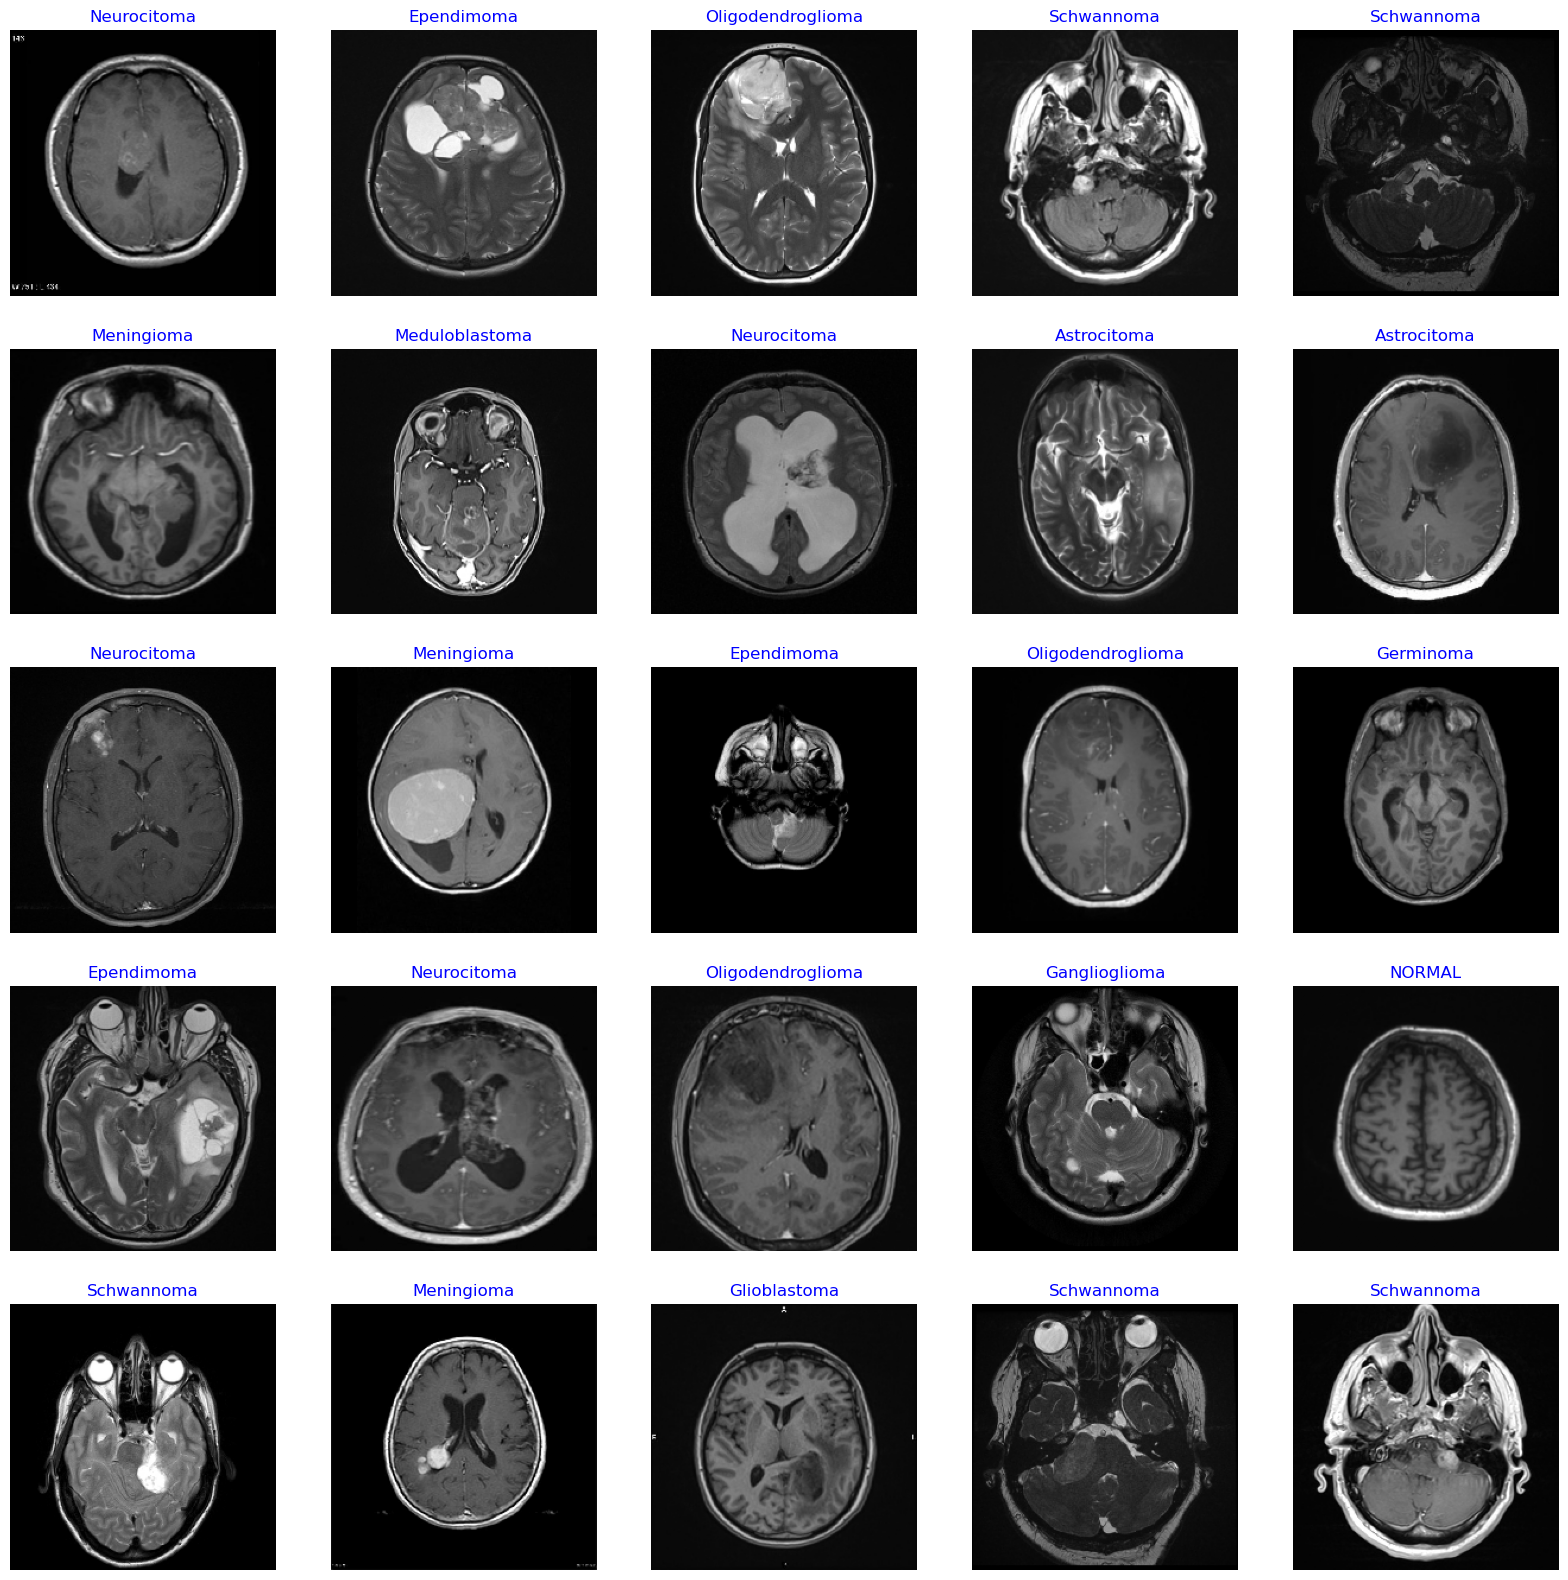

In [25]:
show_images(train_gen)

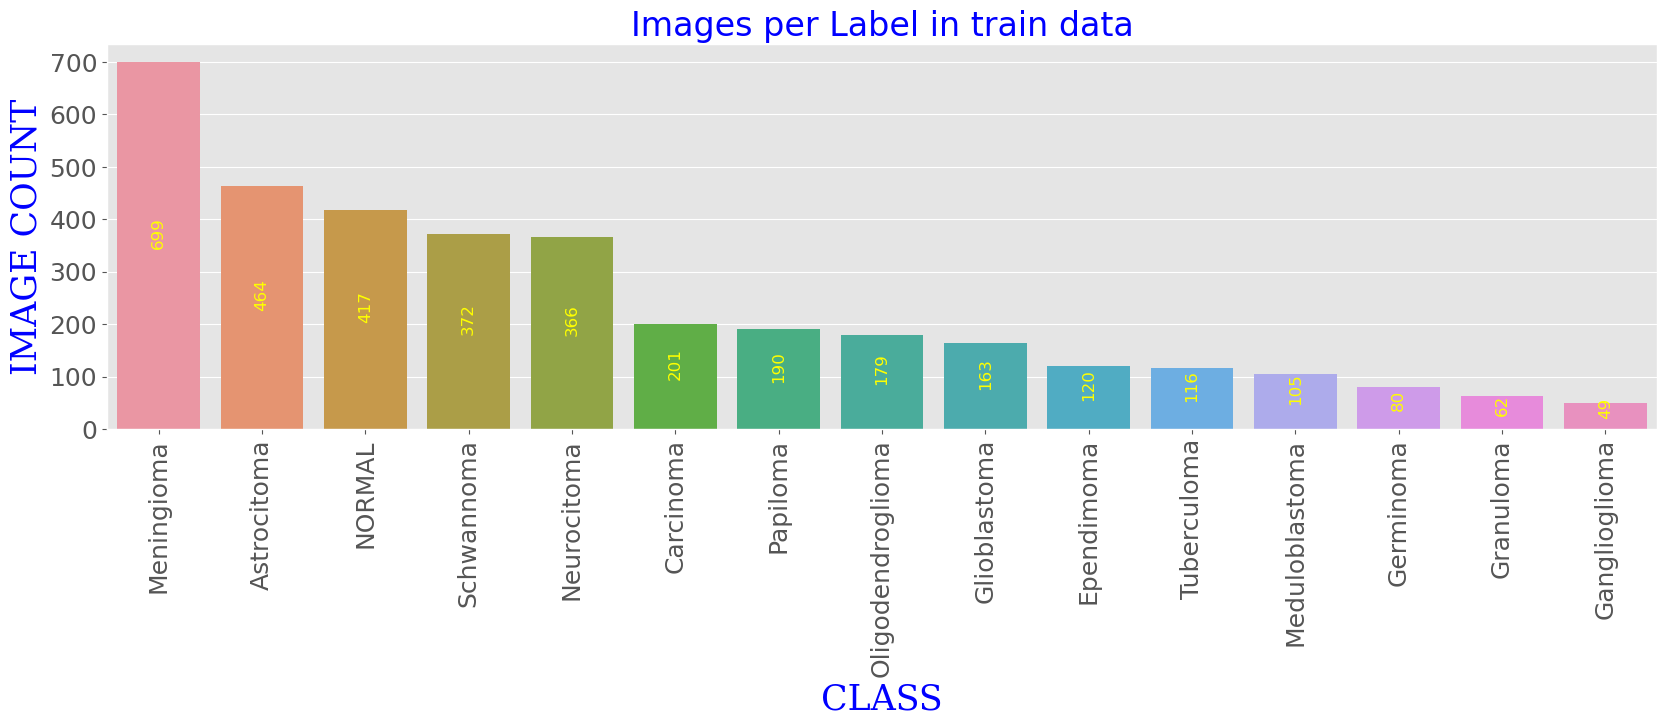

In [26]:
plot_label_count(train_df, 'train')

# **Load EfficientNetB5 pretrained model**

In [27]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer


base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False, 
                                                               weights= "imagenet", 
                                                               input_shape= img_shape, 
                                                               pooling= 'max')
base_model.trainable = False

# **Add the classification layers on top of the base model**

In [28]:
model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, 
          kernel_regularizer= regularizers.l2(l= 0.016), 
          activity_regularizer= regularizers.l1(0.006),
          bias_regularizer= regularizers.l1(0.006), 
          activation= 'relu'),
    
    Dropout(rate= 0.45, 
            seed= 123),
    
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 2048)             28513527  
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                3855      
                                                                 
Total params: 29,050,118
Trainable params: 532,495
Non-trainable params: 28,517,623
______________________________________

# **Train the model**

In [29]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=10,
                           verbose=1)

checkpoint = ModelCheckpoint('inception_model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)


history = model.fit(x= train_gen, 
                    epochs= 100, 
                    callbacks=[early_stop, checkpoint],
                    validation_data= valid_gen)

Epoch 1/100
112/112 [==============================] - ETA: 0s - loss: 9.4927 - accuracy: 0.3869
Epoch 1: val_loss improved from inf to 7.90027, saving model to inception_model_weights.h5
112/112 [==============================] - 781s 7s/step - loss: 9.4927 - accuracy: 0.3869 - val_loss: 7.9003 - val_accuracy: 0.5915
Epoch 2/100
112/112 [==============================] - ETA: 0s - loss: 7.4272 - accuracy: 0.5463
Epoch 2: val_loss improved from 7.90027 to 6.45628, saving model to inception_model_weights.h5
112/112 [==============================] - 776s 7s/step - loss: 7.4272 - accuracy: 0.5463 - val_loss: 6.4563 - val_accuracy: 0.6897
Epoch 3/100
112/112 [==============================] - ETA: 0s - loss: 6.1720 - accuracy: 0.6270
Epoch 3: val_loss improved from 6.45628 to 5.45329, saving model to inception_model_weights.h5
112/112 [==============================] - 831s 7s/step - loss: 6.1720 - accuracy: 0.6270 - val_loss: 5.4533 - val_accuracy: 0.7210
Epoch 4/100
112/112 [===========

# **Plot Acc and loss curves**

In [30]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''
    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = numpy.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = numpy.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

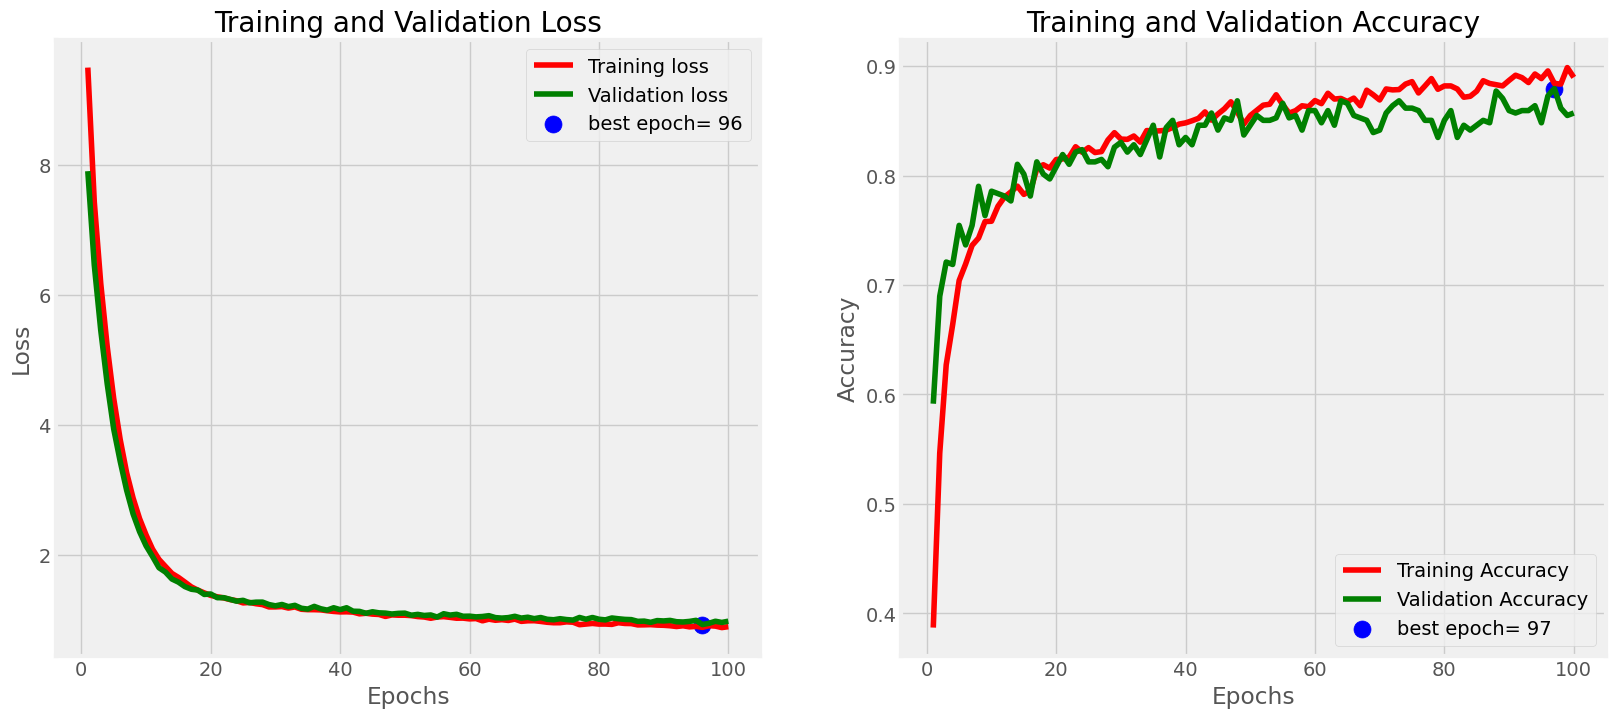

In [31]:
plot_training(history)

# **Evaluate on testing dataset**

In [32]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

7/7 [==============================] - 79s 11s/step - loss: 1.0385 - accuracy: 0.8326
Train Loss:  0.6329818964004517
Train Accuracy:  0.9732142686843872
--------------------
Validation Loss:  0.9213309288024902
Validation Accuracy:  0.8794642686843872
--------------------
Test Loss:  1.0384594202041626
Test Accuracy:  0.8325892686843872


# **Plot Confussion Matrix**

In [33]:
y_pred = model.predict(test_gen)

# Convert the predicted probabilities to class labels
y_pred_labels = numpy.argmax(y_pred, axis=1)

# Get the true class labels from the test data generator
y_true_labels = test_gen.classes

7/7 [==============================] - 83s 11s/step


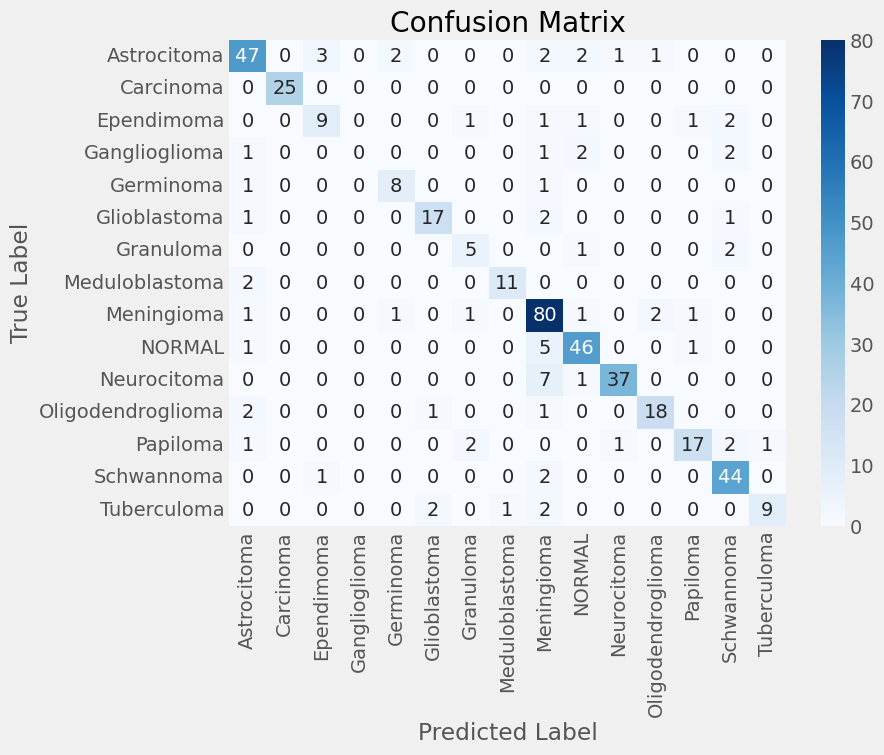

In [34]:
# Get the class names from the generator
class_names = list(test_gen.class_indices.keys())

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Generate Classification Report**

In [35]:
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

print("Classification Report: ")
print(report)

Classification Report: 
                   precision    recall  f1-score   support

      Astrocitoma       0.82      0.81      0.82        58
        Carcinoma       1.00      1.00      1.00        25
       Ependimoma       0.69      0.60      0.64        15
    Ganglioglioma       0.00      0.00      0.00         6
        Germinoma       0.73      0.80      0.76        10
     Glioblastoma       0.85      0.81      0.83        21
        Granuloma       0.56      0.62      0.59         8
   Meduloblastoma       0.92      0.85      0.88        13
       Meningioma       0.77      0.92      0.84        87
           NORMAL       0.85      0.87      0.86        53
      Neurocitoma       0.95      0.82      0.88        45
Oligodendroglioma       0.86      0.82      0.84        22
         Papiloma       0.85      0.71      0.77        24
       Schwannoma       0.83      0.94      0.88        47
      Tuberculoma       0.90      0.64      0.75        14

         accuracy             

c:\Users\popo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\popo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\popo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
